In [1]:
from logging import getLogger
import numpy as np

from grand import AntennaModel

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
params = {'legend.fontsize': 12,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'figure.figsize' : (8, 6),
          #'axes.grid'      : True
          }
plt.rcParams.update(params)


logger = getLogger(__name__)


Welcome to JupyROOT 6.26/02


(221, 361, 91)


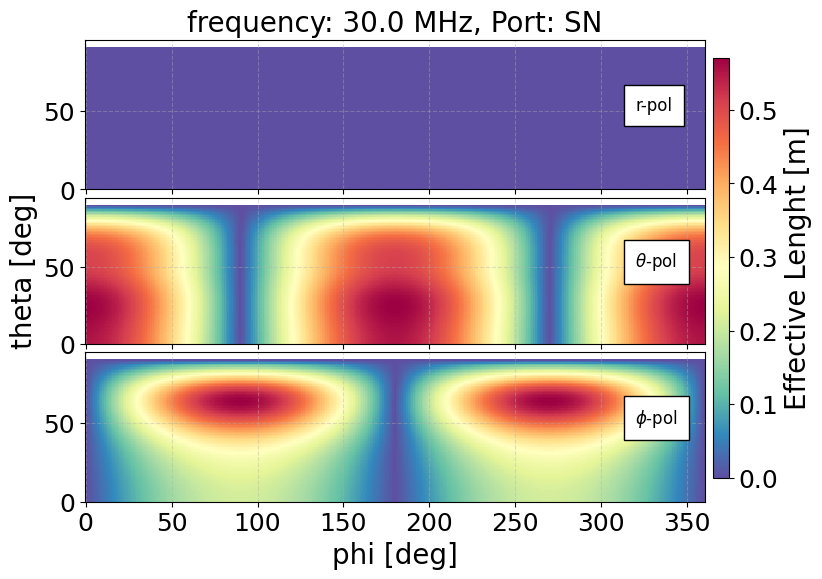

(221, 361, 91)


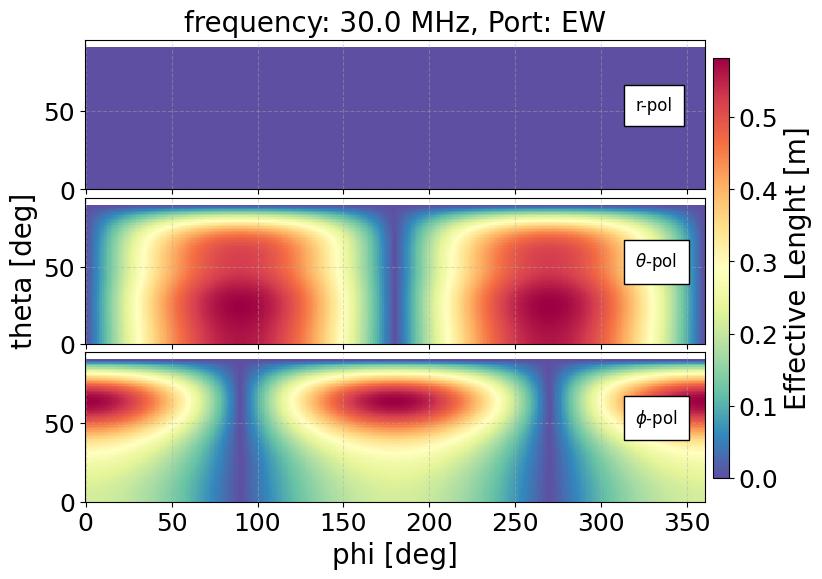

(221, 361, 91)


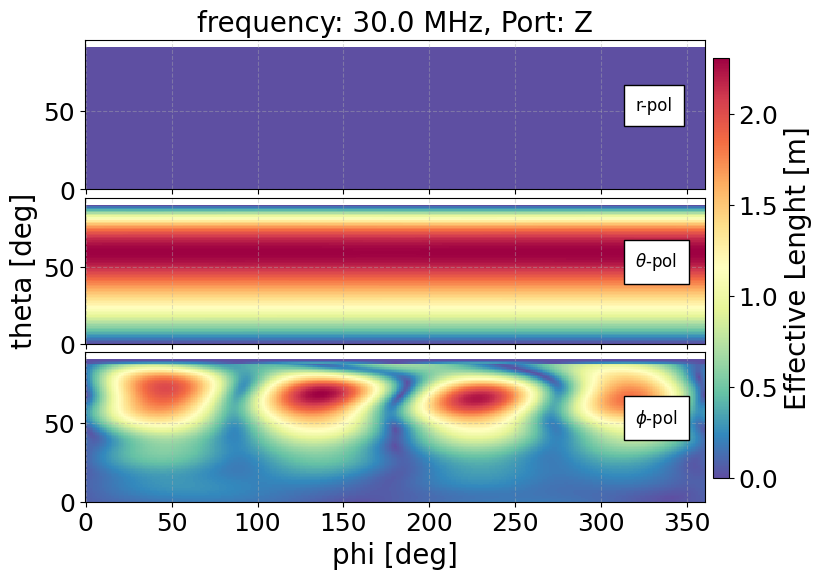

(221, 361, 91)


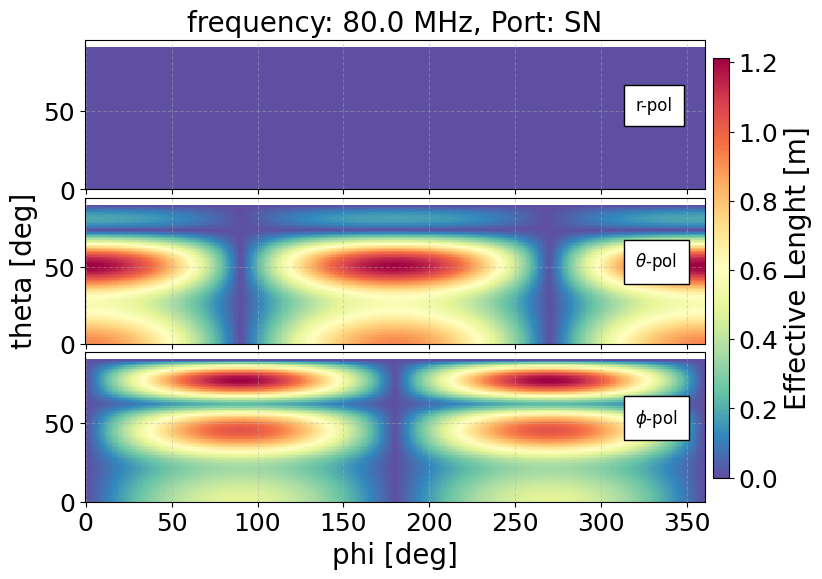

(221, 361, 91)


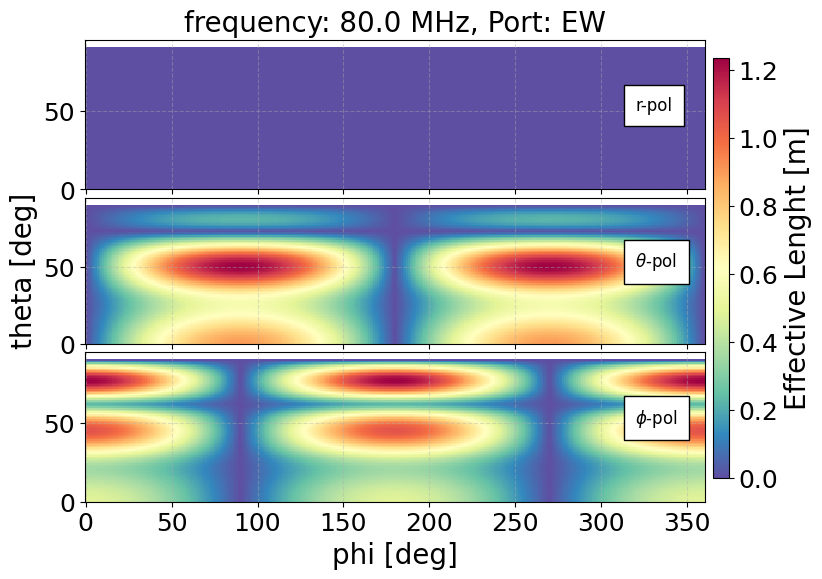

(221, 361, 91)


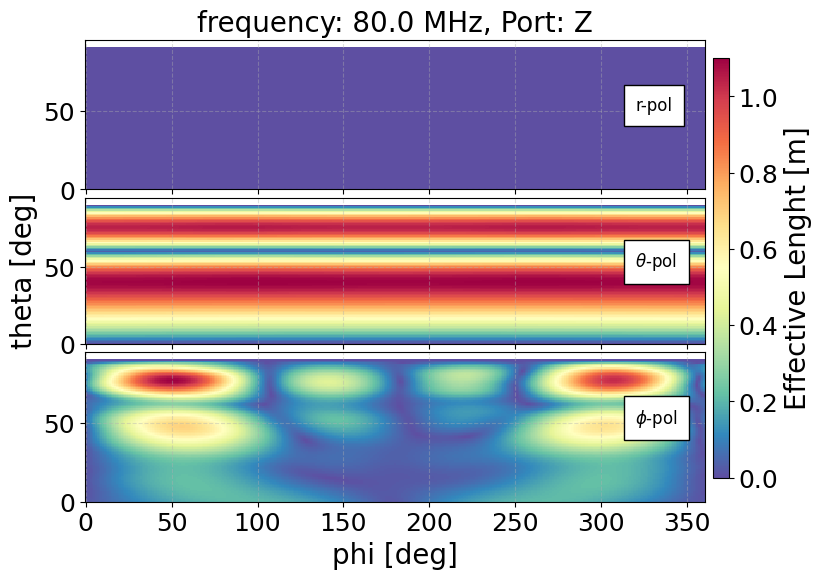

(221, 361, 91)


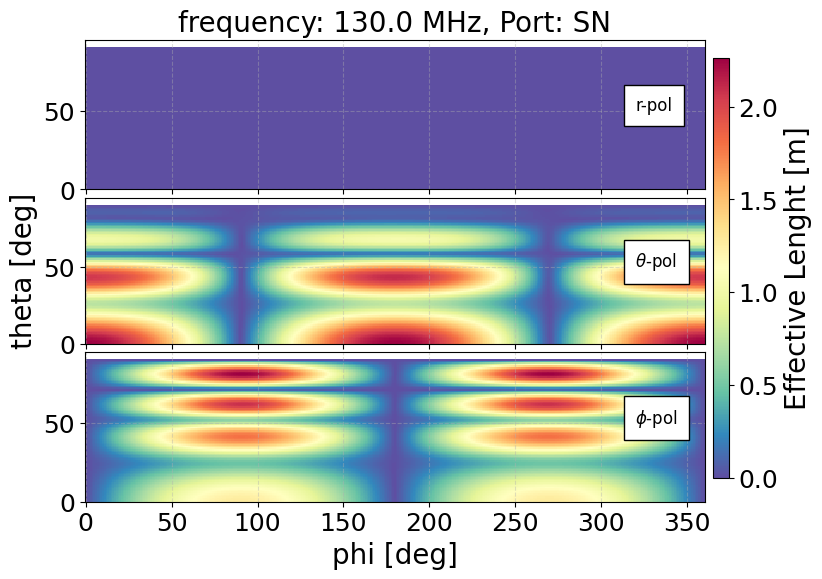

(221, 361, 91)


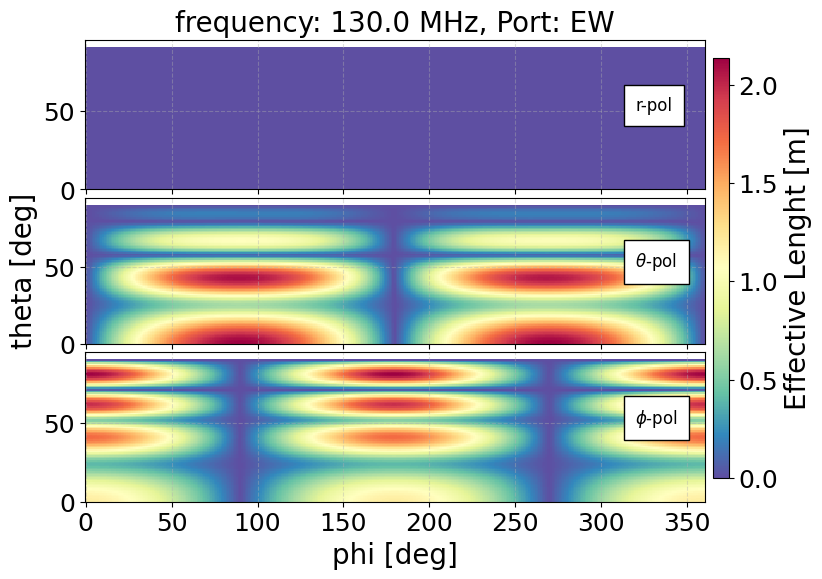

(221, 361, 91)


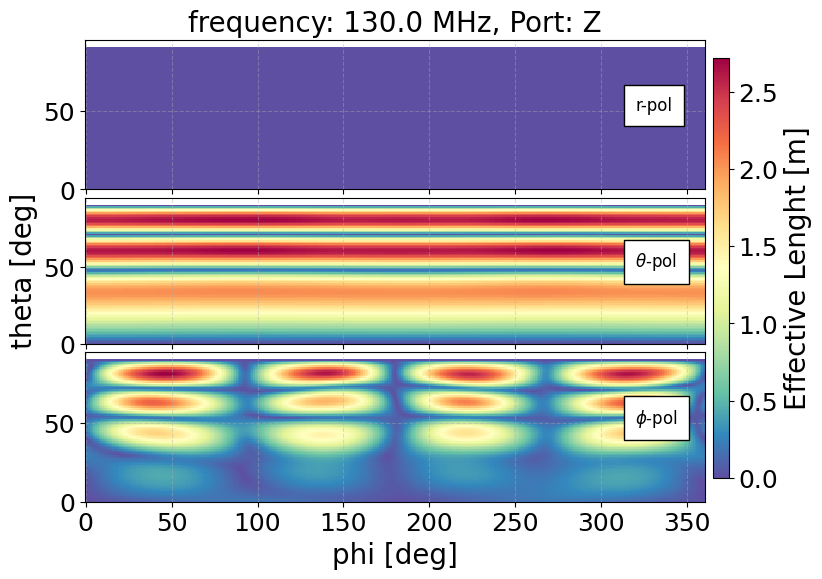

(221, 361, 91)


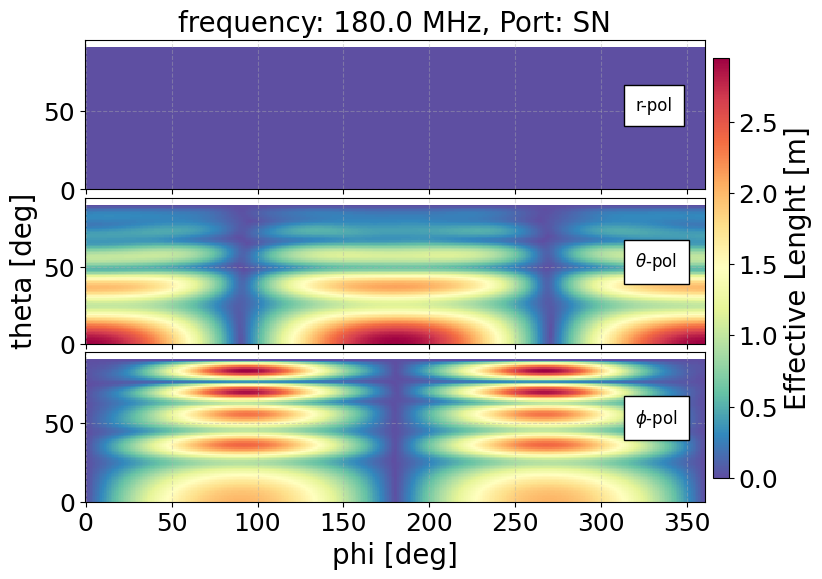

(221, 361, 91)


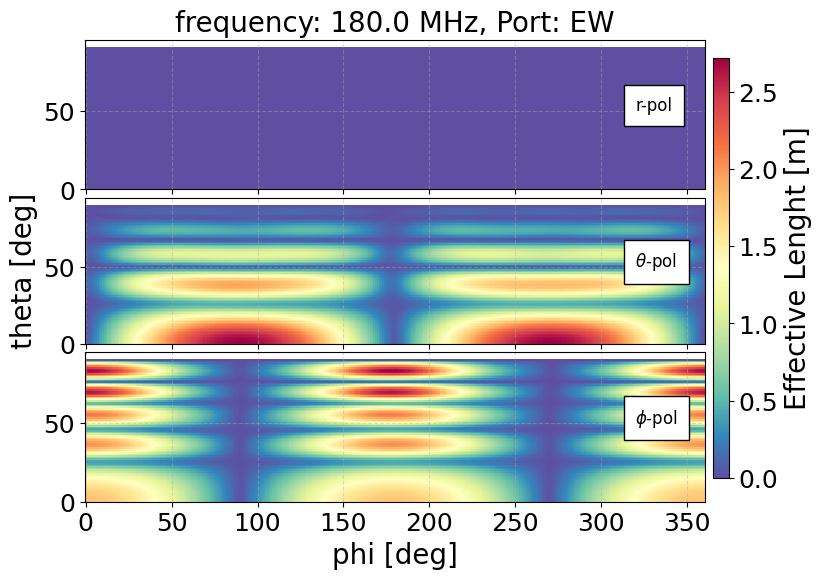

(221, 361, 91)


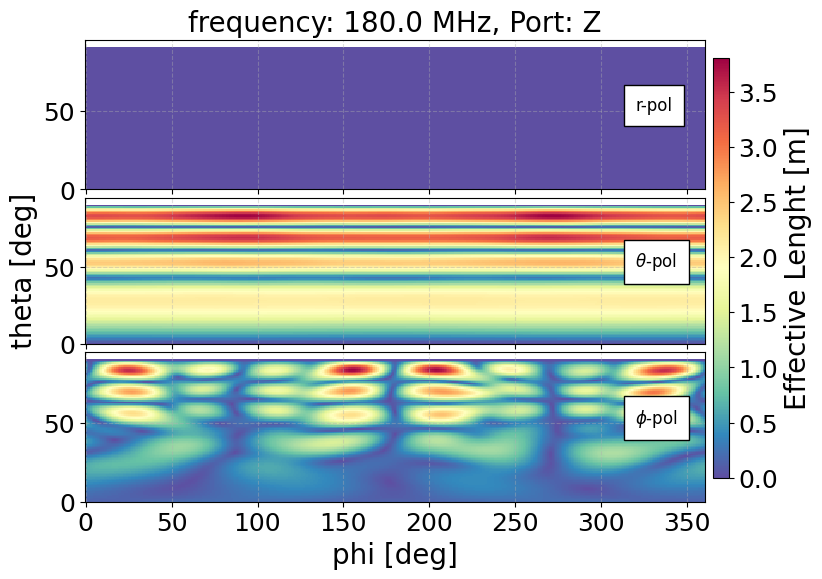

(221, 361, 91)


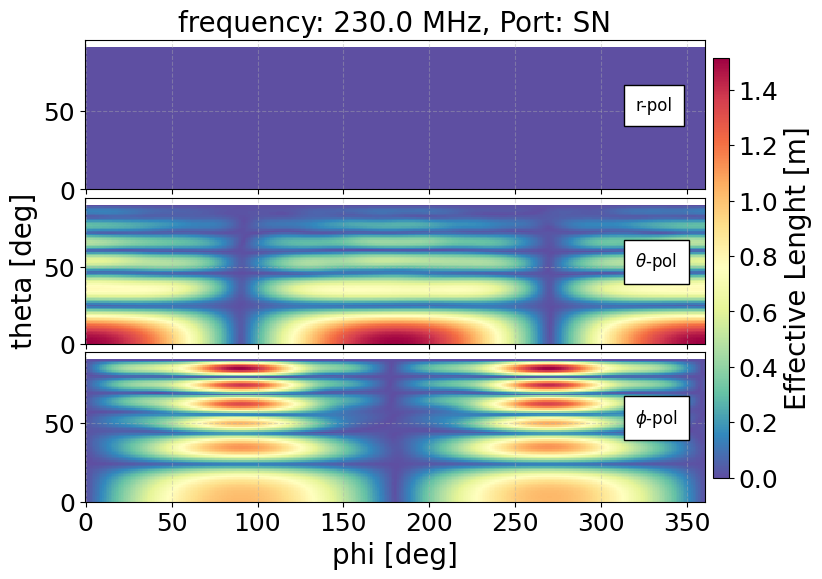

(221, 361, 91)


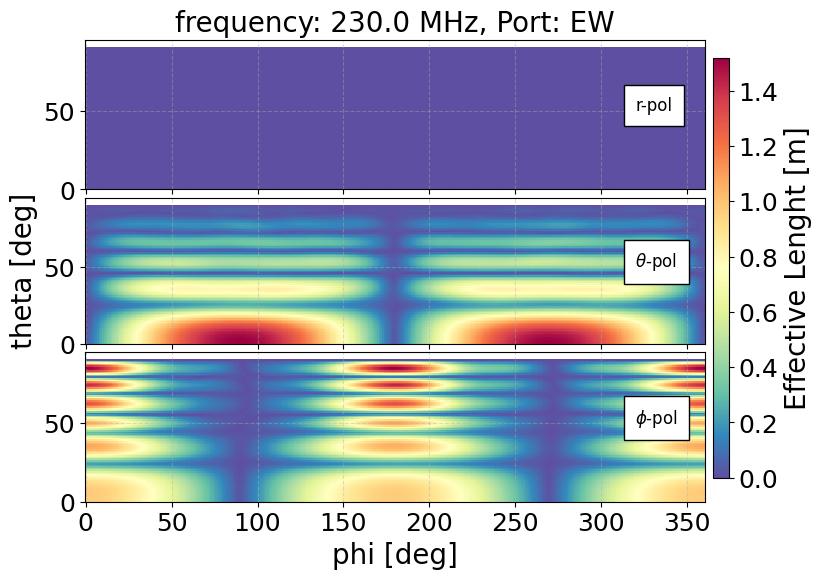

(221, 361, 91)


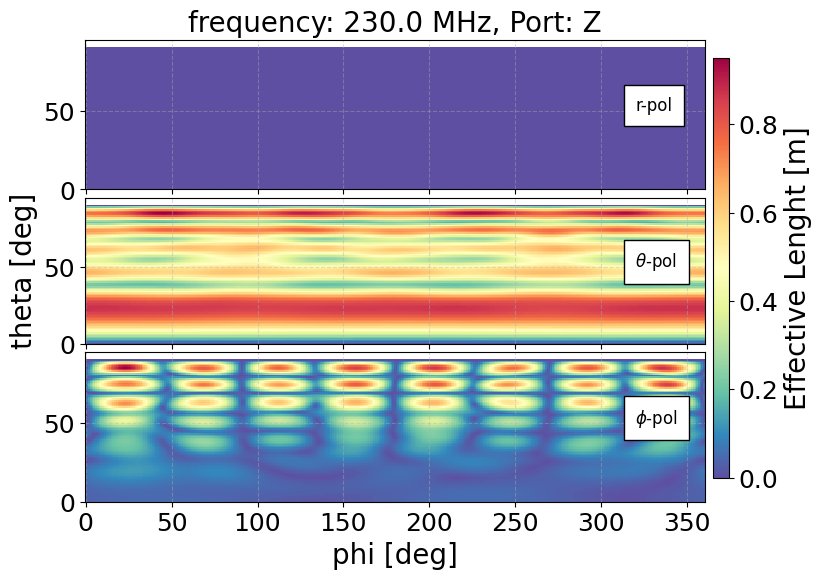

In [13]:
logger.info("Plotting effective lengths in spherical coordinates.")

#ant_model  = AntennaModel() #"GP300"
ant_model  = AntennaModel('GP300')

# Plot for only few selected frequencies.
# If you want to plot for all frequencies, switch the for loop position of port and frequency.
#for i in range(len(frequency)):
for i in [0, 50, 100, 150, 200]:   
    for port in ['SN', 'EW', 'Z']:
        if port=='SN':
            table = ant_model.leff_sn
        if port=='EW':
            table = ant_model.leff_ew
        if port=='Z':
            table = ant_model.leff_z

        frequency = table.frequency/1e6   # Hz --> MHz
        theta     = table.theta
        phi       = table.phi
        L_theta   = table.leff_theta_reim
        L_phi     = table.leff_phi_reim
        print(L_theta.shape)
        L_r       = np.zeros(L_theta.shape)
        
        #print(f"Calculating vmin, vmax of port {port} for plotting...")
        #vmin = np.min([np.min(np.abs(L_theta)), np.min(np.abs(L_phi))])
        #vmax = np.max([np.max(np.abs(L_theta)), np.max(np.abs(L_phi))])
        #print("vmin, vmax: ", vmin, vmax)

        # Plot Leff in spherical.
        fig = plt.figure()
        gs = GridSpec(120, 100)
        ax1 = plt.subplot(gs[:39, :])
        ax2 = plt.subplot(gs[41:79, :])
        ax3 = plt.subplot(gs[81:, :])
        f1 = ax1.pcolormesh(phi, theta,
            np.abs(L_r[i, :, :]).T,    # L_r shape (221nfreq, 361azi, 181zen)
            cmap="Spectral_r",
            #vmin=vmin,
            #vmax=vmax,
            shading='auto',
        )
        f2 = ax2.pcolormesh(phi, theta,
            np.abs(L_theta[i, :, :]).T,   # L_theta shape (221nfreq, 361azi, 181zen)
            cmap="Spectral_r",
            #vmin=vmin,
            #vmax=vmax,
            shading='auto',
        )
        f3 = ax3.pcolormesh(phi, theta,
            np.abs(L_phi[i, :, :]).T,    # L_phi shape (221nfreq, 361azi, 181zen)
            cmap="Spectral_r",
            #vmin=vmin,
            #vmax=vmax,
            shading='auto',
        )
        ax1.set_title("frequency: %.1f MHz, Port: %s" % (frequency[i], port))
        ax2.set_ylabel("theta [deg]")
        ax3.set_xlabel("phi [deg]")
        ax1.set_aspect("auto")
        ax2.set_aspect("auto")
        ax3.set_aspect("auto")
        ax1.set_ylim(0,95)
        ax2.set_ylim(0,95)
        ax3.set_ylim(0,95)
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])
        ax1.grid(ls="--", alpha=0.4)
        ax2.grid(ls="--", alpha=0.4)
        ax3.grid(ls="--", alpha=0.4)
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
        fig.colorbar(f2, cax=cbar_ax, label="Effective Lenght [m]")
        # For legend
        ax1.text(320, 50, "r-pol", bbox={"facecolor": "white", "pad": 8}, fontsize=12)
        ax2.text(320, 50, r"$\theta$-pol", bbox={"facecolor": "white", "pad": 8}, fontsize=12)
        ax3.text(320, 50, r"$\phi$-pol", bbox={"facecolor": "white", "pad": 8}, fontsize=12)
        plt.show()
